<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Linear Activation Function')

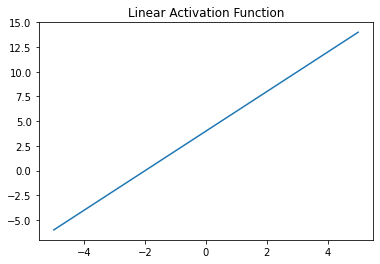

In [3]:
# Linear Actication Function
# y = mx+b

X = np.linspace(-5,5,100)
m=2
b=4
y=m*X + b
plt.plot(X,y)
plt.title('Linear Activation Function')

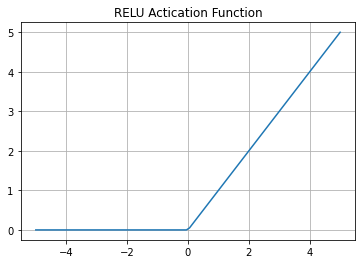

In [4]:
# RELU Activation function
# y = x for x>=0, and 0 other wise
N=100
X = np.linspace(-5,5,N)
y =[]
for i in range(N):
    temp =max(0,X[i])
    y.append(temp)

plt.plot(X,y)
plt.title('RELU Actication Function')
plt.grid()


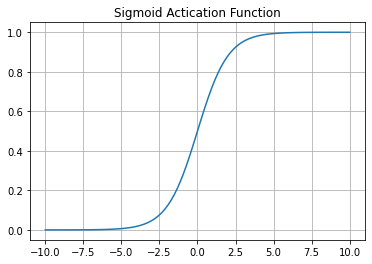

In [5]:
# Sigmoid Activation function
# y = 1/(1+e^-x)

N=100
X = np.linspace(-10,10,N)
y =[]
for i in range(N):
    temp1 = np.exp(-X[i])
    temp2 = 1/(1+temp1)
    y.append(temp2)

plt.plot(X,y)
plt.title('Sigmoid Actication Function')
plt.grid()

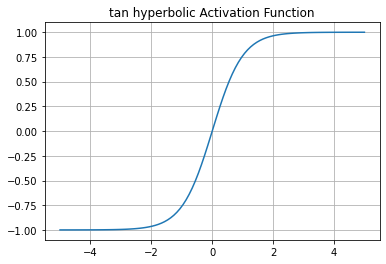

In [6]:
# tanh Activation function
# y = (e^x - e^-x)/(e^x +e^-x)

N=100
X = np.linspace(-5,5,N)
y =[]
for i in range(N):
    temp1 = np.exp(X[i])
    temp2 = np.exp(-X[i])
    temp3 = (temp1 - temp2)/ (temp1 + temp2)
    y.append(temp3)

plt.plot(X,y)
plt.title('tan hyperbolic Activation Function')
plt.grid()

Text(0.5, 1.0, 'log of odds (base e)')

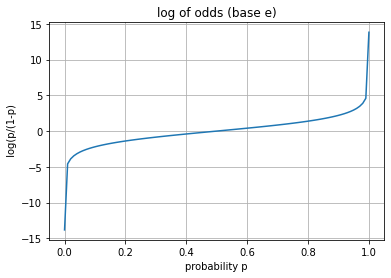

In [7]:
# here, from probability of an event, we can compute the log of odds 
# probability goes from 0 to 1
# log of odds goes from -10 to 10 or may be -infinity to +infinity
# log of odds = log base e (p/(1-p)), where p is the probability of the occurance of the event

prob=np.linspace(0.000001,0.999999,100)

log_of_odds=[]
for p in prob:
    temp = np.log(p/(1-p))
    log_of_odds.append(temp)
    
plt.plot(prob, log_of_odds)
plt.xlabel('probability p')
plt.ylabel(' log(p/(1-p)')
plt.grid()
plt.title('log of odds (base e)')

Text(0.5, 1.0, 'the S curve of the logistic regression')

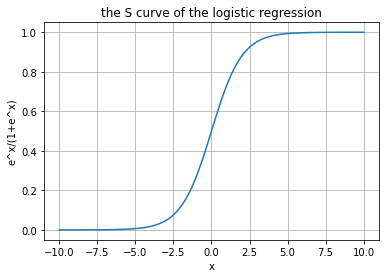

In [8]:
# from log of odds to probability, we get the sigmoid function
# when log of odds goes from-infinity to + infinity
# probability goes from 0 to 1, with a beautiful S curve

log_odds=np.linspace(-10,10,100)

p=np.e**(log_odds)/(1+np.e**(log_odds))

plt.plot(log_odds,p)
plt.grid()
plt.xlabel('x')
plt.ylabel('e^x/(1+e^x)')
plt.title('the S curve of the logistic regression')

Text(0.5, 1.0, 'The Sigmoid function')

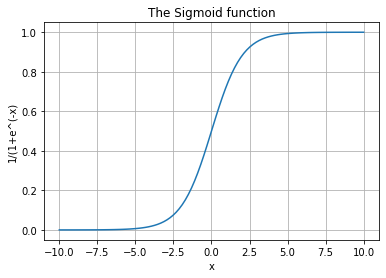

In [9]:
# the sigmoid function

x=np.linspace(-10,10,100)
our_sigmoid=1/(1+np.e**(-x))

plt.plot(x,our_sigmoid)
plt.grid()
plt.xlabel('x')
plt.ylabel('1/(1+e^(-x)')
plt.title('The Sigmoid function')

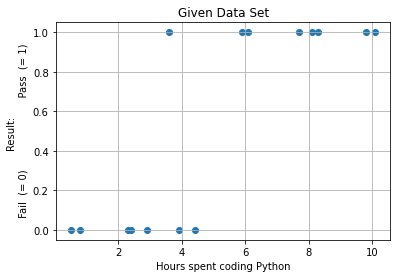

In [10]:
# x is hours spent on coding in Python per day
# y is result Pass/Fail

x=np.array([0.5,   0.8,  2.3, 2.4,  2.9,  3.6, 3.9,   4.4,    5.9,   6.1,  7.7,   8.1,  8.3,  9.8,  10.1 ])
y=np.array([0,     0,    0,    0,    0,    1,   0,     0,      1,      1,      1,    1,    1,    1,   1 ])

plt.scatter(x,y)
plt.xlabel('Hours spent coding Python')
plt.ylabel('Result: \n Fail  (= 0)                       Pass  (= 1)')
plt.title('Given Data Set')
plt.grid()

number of errors =  1
Original Result =   [0 0 0 0 0 1 0 0 1 1 1 1 1 1 1]
Predicted Result =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


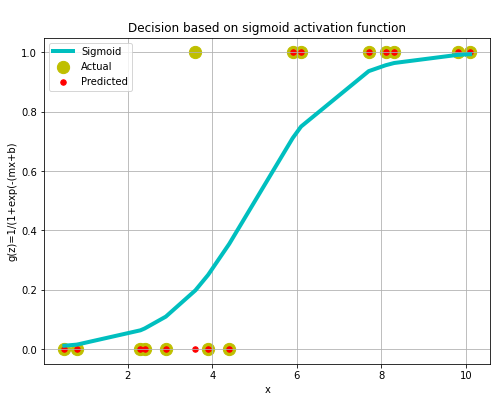

In [11]:
# to compute the values at various stages
# assume b and w, get z=mx+b
# compute g(z)=sigmoid(z)=1/(1+e^(-z))
# set some threshold, and classify the output as 1 or 0

# Some initializations
b = -5      # b=-5, is a good value, by observation
m = 1       # m=1, is a good value, by observation
learning_rate=0.2
treshold = 0.5
N=len(x)

# Steps in ONE iteration
z=[]
g_z=[]
y_hat=[]

# Computing Z, and the sigmoid function g(z)
for i in range(N):
    temp1 = m*x[i] + b
    temp2=(np.e)**(-temp1)
    temp3 = 1/(1+temp2)
    z.append(temp1)
    g_z.append(temp3)


for i in range(N):
    if g_z[i] >= treshold:
        decision = 1
    else:
        decision = 0
    y_hat.append(decision)

number_of_errors=0

for i in range(N):
    if y[i] == y_hat[i]:
        val=0
    else:
        val=1
    number_of_errors +=val

print('number of errors = ', number_of_errors)

plt.figure(figsize=(8,6))
plt.plot(x,g_z, c='c',label = 'Sigmoid', lw=4)
plt.scatter(x,y,c='y', label = 'Actual',s=150)
plt.scatter(x,y_hat,c='r',label='Predicted', s=30)
plt.xlabel('x')
plt.ylabel('g(z)=1/(1+exp(-(mx+b)')
plt.grid()
plt.legend()
plt.title('\nDecision based on sigmoid activation function')

print('Original Result =  ', y)
print('Predicted Result = ',  y_hat)

# to compute the errors 
y_hat.clear()
g_z.clear()


m_new = 1.0149044790001491
b_new = -4.997510946712115
number of errors =  1


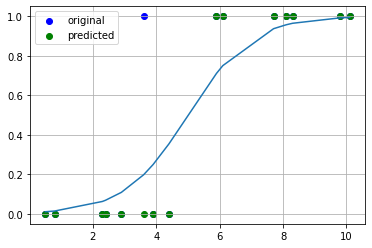

m_new = 1.0269155487217259
b_new = -4.99555407561079
number of errors =  1


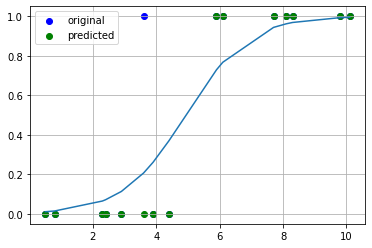

In [12]:
# to compute the gradient
NUM_iter=2

for iter in range(NUM_iter):
    b_grad=[]
    m_grad=[]
    y_hat.clear()
    g_z.clear()
    b_grad.clear()
    m_grad.clear()
    
    for i in range(N):
        temp1 = m*x[i] + b
        temp2=(np.e)**(-temp1)
        temp3 = 1/(1+temp2)
        z.append(temp1)
        g_z.append(temp3)

    for i in range(N):
        if g_z[i] >= treshold:
            decision = 1
        else:
            decision = 0
        y_hat.append(decision)
    
    number_of_errors=0
    
    for i in range(N):
        if y[i] == y_hat[i]:
            val=0
        else:
            val=1
        number_of_errors +=val
       
    for i in range(N):
        temp1=g_z[i]
        temp2=(y[i]-temp1)*temp1 *(1-temp1) 
        temp3=temp2*x[i]
        b_grad.append(temp2)
        m_grad.append(temp3)

    b_gradient=(-2/N)*np.sum(b_grad)
    m_gradient=(-2/N)*np.sum(m_grad)

    m = m - (learning_rate * m_gradient)
    b = b -  (learning_rate * b_gradient)

    print('m_new =',m)
    print('b_new =',b)
    print('number of errors = ', number_of_errors)
    plt.plot(x,g_z)
    plt.scatter(x,y,label='original', c='b')
    plt.scatter(x,y_hat, label='predicted',c='g')
    plt.legend()
    plt.grid()
    plt.show()
    
    
    
    

In [13]:
# obtain the confusion marix, and accuracy, recall and F1 score
from sklearn.metrics import confusion_matrix

cnf=confusion_matrix(y,y_hat)
print('Acutal y =    ',y)
print('Predicted y = ',y_hat)
print('Number of Error = ',number_of_errors)
print(cnf)

Acutal y =     [0 0 0 0 0 1 0 0 1 1 1 1 1 1 1]
Predicted y =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Number of Error =  1
[[7 0]
 [1 7]]


In [14]:
from sklearn.metrics import classification_report
CR = classification_report(y,y_hat)
print('Classification Report = ',CR)

Classification Report =                precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


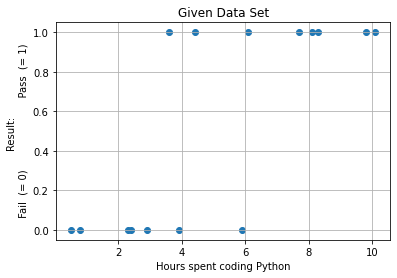

In [16]:
# to generate the data
# x is hours spent on coding in Python per day
# y is result Pass/Fail

x=np.array([0.5,   0.8,  2.3, 2.4,  2.9,  3.6, 3.9,   4.4,    5.9,   6.1,  7.7,   8.1,  8.3,  9.8,  10.1 ])
y=np.array([0,     0,    0,    0,    0,    1,   0,  1,      0,      1,    1,    1,    1,    1,    1 ])

plt.scatter(x,y)
plt.xlabel('Hours spent coding Python')
plt.ylabel('Result: \n Fail  (= 0)                       Pass  (= 1)')
plt.title('Given Data Set')
plt.grid()

In [17]:
N=len(x)
x=x.reshape(N,1)            # making the input x, as a column vector

model=LogisticRegression()  # calling the Logistic Regression Model
model.fit(x,y)              # fitting the model for the given data (x,y)
# compare the results
y_hat=model.predict(x)      # predict y, for the given x
print('original output =  ', y)
print('predicted output = ', y_hat)


original output =   [0 0 0 0 0 1 0 1 0 1 1 1 1 1 1]
predicted output =  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [18]:
conf_mat=confusion_matrix(y,y_hat)
print(conf_mat)
print(classification_report(y,y_hat))

print('\n WHO PEROFRMED BETTER?')

[[6 1]
 [2 6]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15


 WHO PEROFRMED BETTER?
